In [69]:
#From ALY 6040-Module 5 Technique Practice
#Aytaj Khankishiyeva
#Importing necessary libraries
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [70]:
#Read and view dataset
y=pd.read_csv('Reviews.csv')
y

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [71]:
# to understand the type of varaible in the datasets
y.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [72]:
# Checking if there are any missing values
y.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [73]:
#percentage of null values in columns of the entire dataset
y.isna().sum()/y.shape[0]

Id                        0.000000
ProductId                 0.000000
UserId                    0.000000
ProfileName               0.000028
HelpfulnessNumerator      0.000000
HelpfulnessDenominator    0.000000
Score                     0.000000
Time                      0.000000
Summary                   0.000047
Text                      0.000000
dtype: float64

Remove unnecessary Reviews & Narrow it to First 5000 Due To Data Size

In [78]:
train_set = y.loc[(y['Score'] > 2) & (y['Id'] < 15000)]

In [81]:
train_set

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...,...,...
14994,14995,B000EGZ99M,AMP2OWAY2BN0Z,Bonnie Suttle,1,1,4,1282694400,RiceSelect Orzo Whole Wheat Pasta,I've been using the product in dishes that cal...
14995,14996,B000EGZ99M,AH720G9X1MIQ8,KJT,1,1,5,1255824000,Rice Select Whole Wheat Orzo,Could no longer find Rice Select Whole Wheat O...
14996,14997,B000EGZ99M,A1MW2HEG4LF56B,S. Mariconda,3,4,5,1170633600,Absolutely wonderful comfort food!,I discovered this in our local QFC grocery sto...
14997,14998,B000EGZ99M,A1GY0FE07QFFLF,Arlington Cory,0,0,5,1326585600,Whole Wheat Orzo Tasty and Versatile,"Hard to find whole wheat orzo in supermarket, ..."


<AxesSubplot:>

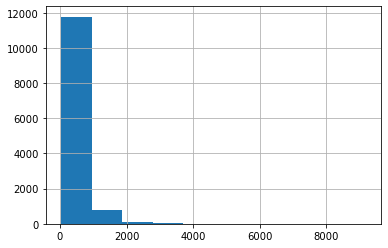

In [8]:
#Look at the number of characters present in each sentence; it can give us approximate idea about Amazon Reviews length.
train_set['Text'].str.len().hist()

In [75]:
#The number of words appearing in each Amazon Reviews
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()


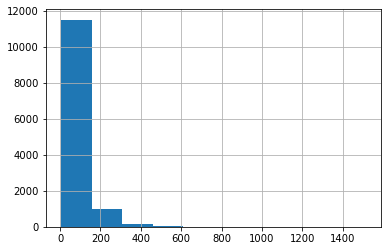

In [76]:
plot_word_number_histogram(train_set['Text'])

<AxesSubplot:>

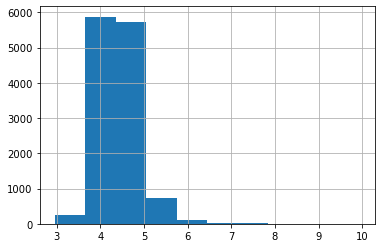

In [11]:
#Check the average word length in each sentence of Text
train_set['Text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Creating wordcloud for Text column

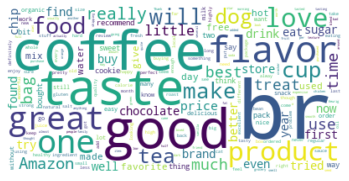

In [29]:
#Importing Libraries

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud


#Creating the text variable

text2 = " ".join(title for title in train_set.Text)
    
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

Creating wordcloud for Summary column

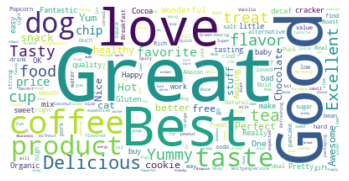

In [30]:
#Creating the text variable

text2 = " ".join(title for title in train_set.Summary)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

Import some packages to remove Stopwords.This helps get rid of junk words which aren't useful

In [32]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag
import re
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/aytajmac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aytajmac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aytajmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Loop to remove nouns

In [51]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Using the loop to remove nouns from the Text column of data

In [34]:
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))

View this loop result

In [82]:
data_nouns

,Text
0,Vitality food products quality product stew me...
2,confection centuries citrus gelatin nuts case ...
4,Great taffy price assortment yummy taffy Deliv...
5,hair taffy pound bag taffy flavors watermelon ...
6,saltwater taffy flavors candy None candies ver...
...,...
14994,product dishes rice mix daughter receipe recip...
14995,Rice Select Whole Wheat Orzo grocery store Ama...
14996,QFC grocery store place Amazon price package. ...
14997,Hard wheat orzo supermarket Amazon Tasty soup ...


Adding Stop Words to remive words that aren't useful to analysis but common

In [83]:
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br','www','http','com']

In [84]:
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)

Turn Data Set Into A Matrix To Look Into Reviews, we are only looking at the Text field)

In [85]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index

In [42]:
# Import the necessary modules for LDA with gensim
#Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [43]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())

Model is ready to build

In [36]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.016*"treats" + 0.016*"dog" + 0.015*"food" + 0.015*"product" + 0.010*"dogs" + 0.009*"amazon" + 0.008*"treat" + 0.008*"taste" + 0.007*"crackers" + 0.007*"bag"'),
 (1,
  '0.058*"coffee" + 0.022*"flavor" + 0.022*"tea" + 0.020*"cup" + 0.017*"taste" + 0.011*"product" + 0.011*"cups" + 0.010*"sugar" + 0.009*"amazon" + 0.009*"water"')]

In [37]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpusn, id2word=id2wordn, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.030*"treats" + 0.030*"dog" + 0.028*"food" + 0.020*"product" + 0.020*"dogs" + 0.016*"treat" + 0.013*"amazon" + 0.009*"price" + 0.008*"newman" + 0.007*"bag"'),
 (1,
  '0.018*"tea" + 0.017*"taste" + 0.017*"flavor" + 0.011*"crackers" + 0.010*"chocolate" + 0.010*"product" + 0.010*"cookies" + 0.009*"sugar" + 0.008*"mix" + 0.007*"water"'),
 (2,
  '0.093*"coffee" + 0.032*"cup" + 0.020*"flavor" + 0.017*"cups" + 0.014*"taste" + 0.011*"amazon" + 0.010*"product" + 0.009*"keurig" + 0.009*"roast" + 0.009*"price"')]

In [38]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpusn, id2word=id2wordn, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.022*"flavor" + 0.019*"crackers" + 0.018*"taste" + 0.011*"sugar" + 0.011*"snack" + 0.010*"chips" + 0.010*"bag" + 0.009*"product" + 0.008*"sauce" + 0.008*"salt"'),
 (1,
  '0.087*"coffee" + 0.031*"tea" + 0.030*"cup" + 0.021*"flavor" + 0.016*"amazon" + 0.016*"cups" + 0.016*"taste" + 0.013*"product" + 0.011*"price" + 0.009*"keurig"'),
 (2,
  '0.021*"chocolate" + 0.020*"product" + 0.016*"cookies" + 0.014*"mix" + 0.013*"milk" + 0.010*"taste" + 0.009*"cookie" + 0.009*"baby" + 0.009*"amazon" + 0.009*"food"'),
 (3,
  '0.042*"treats" + 0.041*"dog" + 0.029*"food" + 0.027*"dogs" + 0.020*"treat" + 0.011*"product" + 0.011*"newman" + 0.008*"bag" + 0.008*"ingredients" + 0.007*"quality"')]

In [87]:
# LDA with topics = 3 and iteration=80
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=80)
ldan.print_topics()

[(0,
  '0.016*"flavor" + 0.015*"taste" + 0.014*"product" + 0.009*"amazon" + 0.008*"sugar" + 0.008*"cookies" + 0.008*"chocolate" + 0.008*"chips" + 0.008*"mix" + 0.008*"crackers"'),
 (1,
  '0.073*"coffee" + 0.030*"tea" + 0.026*"cup" + 0.020*"flavor" + 0.015*"taste" + 0.014*"cups" + 0.014*"product" + 0.012*"amazon" + 0.010*"price" + 0.007*"roast"'),
 (2,
  '0.036*"food" + 0.032*"dog" + 0.030*"treats" + 0.021*"dogs" + 0.017*"treat" + 0.014*"product" + 0.008*"newman" + 0.008*"baby" + 0.008*"bag" + 0.007*"ingredients"')]